In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import tarfile
import urllib
import pandas as pd

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = "c:/windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else :
    rc('font', family = 'AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("C:\\Users\\USER\\datasets\\housing\\2018.csv", encoding = 'UTF-8')
data.head()

,year,quarter,business_area,business,sales,week_sales_ratio,00~06_sales_ratio,06~11_sales_ratio,11~14_sales_ratio,14~17_sales_ratio,...,weekend_sales_case,00~06_sales_case,06~11_sales_case,11~14_sales_case,14~17_sales_case,17~21_sales_case,21~24_sales_case,man_sales_case,woman_sales_case,store_number
0,2018,1,발달상권,회계사사무소,13919630.0,100,0,0,0,100,...,0,0,0,0,253,0,0,0,253,4
1,2018,1,발달상권,회계사사무소,292218384.0,100,0,0,50,50,...,0,0,0,120,380,0,0,120,380,33
2,2018,1,발달상권,회계사사무소,7079054.0,100,0,0,100,0,...,0,0,0,142,0,0,0,142,0,3
3,2018,1,골목상권,회계사사무소,29000000.0,100,0,0,0,100,...,0,0,0,0,29,0,0,29,0,4
4,2018,1,발달상권,회계사사무소,312170573.0,100,0,50,0,50,...,0,0,480,0,480,0,0,960,0,5


In [38]:
corr = data.corr()
corr["sales"].sort_values(ascending=False)

sales                     1.000000
week_sales_cost           0.987273
14~17_sales_cost          0.940721
11~14_sales_cost          0.935446
man_sales_cost            0.880859
age_50_sales_cost         0.875297
17~21_sales_cost          0.848334
weekend_sales_cost        0.832766
age_40_sales_cost         0.827980
woman_sales_cost          0.805434
06~11_sales_cost          0.800428
age_30_sales_cost         0.780239
age_over_60_sales_cost    0.757568
age_20_sales_cost         0.597100
21~24_sales_cost          0.528158
14~17_sales_case          0.507557
00~06_sales_cost          0.491155
weekend_sales_case        0.450567
17~21_sales_case          0.443610
11~14_sales_case          0.439385
week_sales_case           0.427916
woman_sales_case          0.421314
store_number              0.416760
age_10_sales_cost         0.405164
man_sales_case            0.367107
21~24_sales_case          0.295998
06~11_sales_case          0.248670
00~06_sales_case          0.236822
11~14_sales_ratio   

In [5]:
data.loc[:, "business"]

0         회계사사무소
1         회계사사무소
2         회계사사무소
3         회계사사무소
4         회계사사무소
           ...  
162661       PC방
162662       PC방
162663       PC방
162664       PC방
162665       PC방
Name: business, Length: 162666, dtype: object

In [6]:
beauty = data.loc[(data["business"]=="미용실") |(data["business"]=="화장품") |
              (data["business"]=="네일숍") |(data["business"]=="피부관리실")]

In [7]:
beauty = beauty.reset_index(drop=True)
beauty.head(25)

,year,quarter,business_area,business,sales,week_sales_ratio,00~06_sales_ratio,06~11_sales_ratio,11~14_sales_ratio,14~17_sales_ratio,...,weekend_sales_case,00~06_sales_case,06~11_sales_case,11~14_sales_case,14~17_sales_case,17~21_sales_case,21~24_sales_case,man_sales_case,woman_sales_case,store_number
0,2018,1,골목상권,화장품,1.460456e+08,78,18,9,23,14,...,611,506,87,73,191,399,509,1413,210,2
1,2018,1,골목상권,화장품,4.129523e+08,78,6,7,17,24,...,348,87,272,332,445,556,183,563,1280,48
2,2018,1,골목상권,화장품,1.478123e+08,89,0,0,2,47,...,138,0,0,20,341,431,10,47,755,12
3,2018,1,발달상권,화장품,2.058271e+10,66,3,2,10,27,...,421107,1642,10857,108672,285468,525784,191147,155315,960840,188
4,2018,1,골목상권,화장품,1.386411e+08,79,0,3,20,38,...,1283,0,151,1104,1908,1876,365,1344,3887,6
5,2018,1,골목상권,화장품,7.203844e+07,95,0,19,26,44,...,19,0,102,140,252,0,39,19,514,8
6,2018,1,골목상권,화장품,9.826393e+06,86,0,4,14,28,...,11,0,3,11,28,44,7,9,84,3
7,2018,1,발달상권,화장품,1.138985e+08,67,17,4,19,17,...,1603,27,194,1253,1280,2195,298,1150,3546,11
8,2018,1,발달상권,화장품,2.068369e+09,70,0,3,17,22,...,45442,0,3280,26154,29675,62220,21708,34258,108779,12
9,2018,1,골목상권,화장품,4.132202e+08,79,0,6,22,29,...,3330,0,661,2291,3945,5791,1156,3249,10211,29


In [9]:
beauty.loc[:,"daytime_case"] = beauty.loc[:,"06~11_sales_case"]+beauty.loc[:,"11~14_sales_case"]+beauty.loc[:,"14~17_sales_case"]
beauty.loc[:,"night_case"] = beauty.loc[:,"00~06_sales_case"]+beauty.loc[:,"17~21_sales_case"]+beauty.loc[:,"21~24_sales_case"]
beauty.loc[:,"daytime_ratio"] = beauty.loc[:,"daytime_case"]/(beauty.loc[:,"daytime_case"] + beauty.loc[:,"night_case"])
beauty.loc[:,"night_ratio"] = beauty.loc[:,"night_case"]/(beauty.loc[:,"daytime_case"] + beauty.loc[:,"night_case"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14542 entries, 0 to 14541
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    14542 non-null  int64  
 1   quarter                 14542 non-null  int64  
 2   business_area           14542 non-null  object 
 3   business                14542 non-null  object 
 4   sales                   14542 non-null  float64
 5   week_sales_ratio        14542 non-null  int64  
 6   00~06_sales_ratio       14542 non-null  int64  
 7   06~11_sales_ratio       14542 non-null  int64  
 8   11~14_sales_ratio       14542 non-null  int64  
 9   14~17_sales_ratio       14542 non-null  int64  
 10  17~21_sales_ratio       14542 non-null  int64  
 11  21~24_sales_ratio       14542 non-null  int64  
 12  man_sales_ratio         14542 non-null  int64  
 13  woman_sales_ratio       14542 non-null  int64  
 14  week_sales_cost         14542 non-null

In [10]:
beauty_drop = beauty.drop(["00~06_sales_case","06~11_sales_case","11~14_sales_case","14~17_sales_case","17~21_sales_case","21~24_sales_case"], axis=1)
beauty_drop = beauty.drop(["00~06_sales_ratio","06~11_sales_ratio","11~14_sales_ratio","14~17_sales_ratio","17~21_sales_ratio","21~24_sales_ratio"], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14542 entries, 0 to 14541
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    14542 non-null  int64  
 1   quarter                 14542 non-null  int64  
 2   business_area           14542 non-null  object 
 3   business                14542 non-null  object 
 4   sales                   14542 non-null  float64
 5   week_sales_ratio        14542 non-null  int64  
 6   man_sales_ratio         14542 non-null  int64  
 7   woman_sales_ratio       14542 non-null  int64  
 8   week_sales_cost         14542 non-null  float64
 9   weekend_sales_cost      14542 non-null  int64  
 10  00~06_sales_cost        14542 non-null  int64  
 11  06~11_sales_cost        14542 non-null  float64
 12  11~14_sales_cost        14542 non-null  float64
 13  14~17_sales_cost        14542 non-null  int64  
 14  17~21_sales_cost        14542 non-null

In [11]:
beauty_drop_2 = beauty_drop.drop([column for column in beauty.columns if 'case' in column], axis=1)
beauty_drop_3 = beauty_drop_2.drop([column for column in beauty.columns if 'cost' in column], axis=1)
beauty_drop_4 = beauty_drop_3.drop(['year'], axis=1)
beauty_drop_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14542 entries, 0 to 14541
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quarter            14542 non-null  int64  
 1   business_area      14542 non-null  object 
 2   business           14542 non-null  object 
 3   sales              14542 non-null  float64
 4   week_sales_ratio   14542 non-null  int64  
 5   man_sales_ratio    14542 non-null  int64  
 6   woman_sales_ratio  14542 non-null  int64  
 7   store_number       14542 non-null  int64  
 8   daytime_ratio      14542 non-null  float64
 9   night_ratio        14542 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.1+ MB


In [17]:
beauty_drop_4.loc[beauty_drop_4["store_number"]==0, 'store_number'] = 1
beauty_drop_4_2 = beauty_drop_4.loc[(beauty_drop_4["sales"]/beauty_drop_4["store_number"]<= 100000000)]
beauty_labels = beauty_drop_4_2['sales']/beauty_drop_4_2['store_number']
beauty_labels_2 = beauty_drop_4['sales']/beauty_drop_4['store_number']
beauty_drop_5 = beauty_drop_4_2.drop(['quarter', 'business_area', 'business', 'sales'], axis=1)

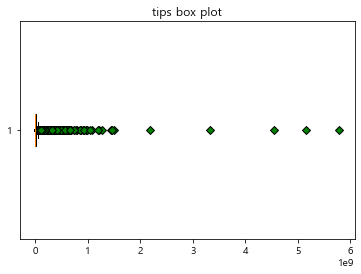

In [18]:

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(beauty_labels_2,vert=False, flierprops=green_diamond)
plt.title("tips box plot")
plt.show()

<AxesSubplot:>

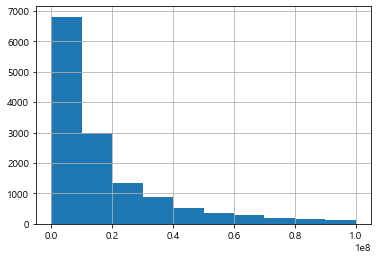

In [19]:
beauty_labels.hist()


In [20]:
from sklearn.preprocessing import OneHotEncoder

data_business_area=beauty_drop_4_2[["business_area"]]
data_business=beauty_drop_4_2[["business"]]
data_quarter=beauty_drop_4_2[["quarter"]]

data_encoder = OneHotEncoder()
business_area_data_1hot = data_encoder.fit_transform(data_business_area)
business_data_1hot = data_encoder.fit_transform(data_business)
quarter_data_1hot = data_encoder.fit_transform(data_quarter)

business_area_data_1hot.toarray()
business_data_1hot.toarray()
quarter_data_1hot.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [21]:
def min_max_scaler(data):
  numerator= data - np.min(data,0)
  denominator = np.max(data,0) - np.min(data,0)
  return numerator / (denominator + 1e-7)

nomalization = min_max_scaler(beauty_drop_5.to_numpy())


print(nomalization)


[[0.78       0.83       0.17       0.00510204 0.19886684 0.80113306]
 [0.78       0.27       0.73       0.23979592 0.55946661 0.44053329]
 [0.89       0.12       0.88       0.05612245 0.45012464 0.54987526]
 ...
 [0.7        0.14       0.86       0.02040816 0.57024788 0.42975202]
 [0.9        0.08       0.92       0.         0.9999999  0.        ]
 [0.91       0.03       0.98       0.02040816 0.24999998 0.74999993]]


In [22]:
onehot_feature=np.concatenate((quarter_data_1hot.toarray(),business_area_data_1hot.toarray(), business_data_1hot.toarray()),axis=1)

pd_onehot_feature = pd.DataFrame(onehot_feature)
pd_onehot_feature


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13648,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
13649,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13650,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
13651,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
pd_nomalization = pd.DataFrame(nomalization)
pd_nomalization


,0,1,2,3,4,5
0,0.78,0.83,0.17,0.005102,0.198867,0.801133
1,0.78,0.27,0.73,0.239796,0.559467,0.440533
2,0.89,0.12,0.88,0.056122,0.450125,0.549875
3,0.79,0.28,0.72,0.025510,0.585307,0.414693
4,0.95,0.03,0.97,0.035714,0.926829,0.073171
...,...,...,...,...,...,...
13648,0.90,0.06,0.94,0.005102,0.635220,0.364780
13649,0.88,0.00,1.00,0.000000,0.583333,0.416667
13650,0.70,0.14,0.86,0.020408,0.570248,0.429752
13651,0.90,0.08,0.92,0.000000,1.000000,0.000000


In [24]:
print(type(onehot_feature))
print(type(nomalization))

prepared_data = np.concatenate((onehot_feature, nomalization), axis=1)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [25]:
pd_prepared_data = pd.DataFrame(prepared_data)
pd_prepared_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.78,0.83,0.17,0.005102,0.198867,0.801133
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.78,0.27,0.73,0.239796,0.559467,0.440533
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.89,0.12,0.88,0.056122,0.450125,0.549875
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.79,0.28,0.72,0.025510,0.585307,0.414693
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.95,0.03,0.97,0.035714,0.926829,0.073171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13648,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.90,0.06,0.94,0.005102,0.635220,0.364780
13649,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.88,0.00,1.00,0.000000,0.583333,0.416667
13650,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.70,0.14,0.86,0.020408,0.570248,0.429752
13651,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.90,0.08,0.92,0.000000,1.000000,0.000000


In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(pd_prepared_data, test_size=0.2, random_state=42)
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
10332,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.67,0.59,0.41,0.015306,0.641189,0.358811
11906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.82,0.08,0.93,0.010204,0.542721,0.457278
4963,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.74,0.41,0.59,0.005102,0.314607,0.685393
4003,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.79,0.54,0.46,0.020408,0.065041,0.934959
8114,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.61,0.45,0.55,0.020408,0.517602,0.482398


In [27]:
from sklearn.model_selection import train_test_split
labels_train_set, labels_test_set = train_test_split(beauty_labels, test_size=0.2, random_state=42)
labels_test_set.head()

11156    2.786339e+06
12761    2.181929e+07
5663     4.316799e+06
4678     5.433680e+06
8883     8.090401e+06
dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit (train_set, labels_train_set)

LinearRegression()

In [29]:
some_data = train_set.iloc[:5]
some_labels = labels_train_set.iloc[:5]
lin_reg.predict(some_data)

array([20054016., 20316160., 25034752., 11927552., 10092544.])

In [30]:
from sklearn.metrics import mean_squared_error

beauty_prediction = lin_reg.predict(train_set)
lin_mse = mean_squared_error(labels_train_set, beauty_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

17655480.516330507

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(train_set, labels_train_set)

DecisionTreeRegressor(random_state=42)

In [32]:
beauty_predictions = tree_reg.predict(train_set)
tree_mse = mean_squared_error(labels_train_set, beauty_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

902689.9609241772

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_set, labels_train_set, scoring = "neg_mean_squared_error", cv =10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([22144733.92378784, 23713928.75544764, 21815331.72535552,
       22910334.88819966, 22396793.07160888, 22585919.9651917 ,
       22841316.41482251, 21226787.01963418, 21609067.74870016,
       22796430.55705009])

In [34]:


def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())
    
display_scores(tree_rmse_scores)


점수: [22144733.92378784 23713928.75544764 21815331.72535552 22910334.88819966
 22396793.07160888 22585919.9651917  22841316.41482251 21226787.01963418
 21609067.74870016 22796430.55705009]
평균: 22404064.406979818
표준편차: 691533.0393663037


In [ ]:
lin_scores = cross_val_score(lin_reg, train_set, labels_train_set, scoring ="neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
pd_df = pd.DataFrame(lin_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators =100, random_state = 42)
forest_reg.fit(train_set, labels_train_set)

In [ ]:
beauty_predictions = forest_reg.predict(train_set)
forest_mse = mean_squared_error(labels_train_set, beauty_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, train_set, labels_train_set,
                                scoring ="neg_mean_squared_error", cv =10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8,10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
  ]

forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg, param_grid, cv =5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(train_set, labels_train_set)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'n_estimators': randint(low =1, high = 200),
    'max_features': randint(low =1, high = 8),
 }

forest_reg = RandomForestRegressor(random_state =42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                               n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
rnd_search.fit(train_set, labels_train_set)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(test_set)

final_mse = mean_squared_error(labels_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

,quarter,sales,week_sales_ratio,man_sales_ratio,woman_sales_ratio,store_number,daytime_ratio,night_ratio
count,14542.000000,1.454200e+04,14542.000000,14542.000000,14542.000000,14542.000000,14542.000000,14542.000000
mean,2.497593,3.274414e+08,74.042360,33.816944,66.274034,7.819763,0.538432,0.461568
std,1.118685,1.899456e+09,13.604046,21.883912,21.878535,14.774007,0.164150,0.164150
min,1.000000,4.063300e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.425130e+07,66.000000,16.000000,50.000000,2.000000,0.458625,0.388230
50%,2.000000,4.739436e+07,73.000000,33.000000,67.000000,4.000000,0.543523,0.456477
75%,3.000000,1.592704e+08,82.000000,50.000000,84.000000,8.000000,0.611770,0.541375
max,4.000000,7.231794e+10,100.000000,100.000000,100.000000,365.000000,1.000000,1.000000


17516732.42657611